In [1]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Membaca file csv menggunakan pandas
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Praktikum_ML/praktikum03/data/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#Melihat statistik deskriptif pada kolom numerik
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [4]:
#Mencari Informasi Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Hapus kolom yang tidak relevan untuk di analisis (ID, tanggal)
cols_to_drop = ['instant', 'dteday', 'casual', 'registered']
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
df = df.drop(existing_cols_to_drop, axis=1)

# Cek data hilang (missing values)
print(df.isnull().sum())

# Jika ada data kategorikal, ubah ke tipe kategori bila perlu
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_cols:
    if col in df.columns: # Check if column exists before converting
        df[col] = df[col].astype('category')

df.head()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [6]:
#Analisis Korelasi
corr_matrix = df.corr()

print(corr_matrix)

              season        yr      mnth   holiday   weekday  workingday  \
season      1.000000 -0.001844  0.831440 -0.010537 -0.003080    0.012485   
yr         -0.001844  1.000000 -0.001792  0.007954 -0.005461   -0.002013   
mnth        0.831440 -0.001792  1.000000  0.019191  0.009509   -0.005901   
holiday    -0.010537  0.007954  0.019191  1.000000 -0.101960   -0.253023   
weekday    -0.003080 -0.005461  0.009509 -0.101960  1.000000    0.035790   
workingday  0.012485 -0.002013 -0.005901 -0.253023  0.035790    1.000000   
weathersit  0.019211 -0.048727  0.043528 -0.034627  0.031087    0.061200   
temp        0.334315  0.047604  0.220205 -0.028556 -0.000170    0.052660   
atemp       0.342876  0.046106  0.227459 -0.032507 -0.007537    0.052182   
hum         0.205445 -0.110651  0.222204 -0.015937 -0.052232    0.024327   
windspeed  -0.229046 -0.011817 -0.207502  0.006292  0.014282   -0.018796   
cnt         0.406100  0.566710  0.279977 -0.068348  0.067443    0.061156   

           

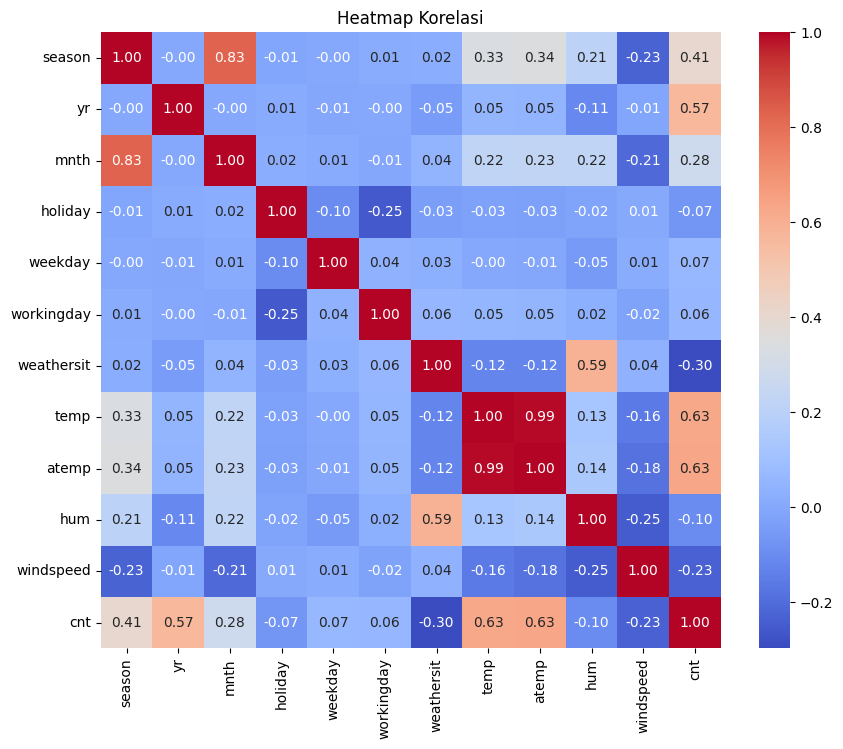

In [7]:
#Heatmap Grafik
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

In [8]:
#Membagi datase untuk Training dan Test
from sklearn.model_selection import train_test_split

# Y = kolom target (jumlah penyewaan sepeda), Variabel dependen
Y = df['cnt']

# X = semua variabel lain yang bisa memengaruhi jumlah peminjaman sepeda, Variabel independen
X = df[['season', 'mnth', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]

# 80% untuk training, 20% untuk testing
# random_state memastikan hasil acak selalu sama (konsisten) setiap dijalankan
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

#Cetak pembagian data
print("Jumlah Data Train :", len(X_train))
print("Jumlah Data Test  :", len(X_test))

X_train.head()

Jumlah Data Train : 584
Jumlah Data Test  : 147


,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
682,4,11,0,2,1,2,0.343333,0.323225,0.662917,0.342046
250,3,9,0,4,1,3,0.633913,0.555361,0.939565,0.192748
336,4,12,0,6,0,1,0.299167,0.310604,0.612917,0.095783
260,3,9,0,0,0,1,0.507500,0.490537,0.695000,0.178483
543,3,6,0,3,1,1,0.697500,0.640792,0.360000,0.271775


In [9]:
#Pemodelan
import statsmodels.api as sm

#Menambahkan konstanta
X_train_cons = sm.add_constant(X_train)
X_train_cons.head()

,const,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
682,1.0,4,11,0,2,1,2,0.343333,0.323225,0.662917,0.342046
250,1.0,3,9,0,4,1,3,0.633913,0.555361,0.939565,0.192748
336,1.0,4,12,0,6,0,1,0.299167,0.310604,0.612917,0.095783
260,1.0,3,9,0,0,0,1,0.507500,0.490537,0.695000,0.178483
543,1.0,3,6,0,3,1,1,0.697500,0.640792,0.360000,0.271775


In [10]:
#Membuat model OLS
model = sm.OLS(Y_train, X_train_cons).fit()
print('-----------------------------')
print(model.params)
print('-----------------------------')
const = model.params['const']
x1_temp = model.params['temp']
x2_hum = model.params['hum']

#Persamaan regresi
print(f"y = {const:.3f} + ({x1_temp:.3f})*temp + ({x2_hum:.3f})*hum")

-----------------------------
const         2891.631073
season         468.077569
mnth           -18.984531
holiday       -399.468526
weekday         63.480425
workingday     122.214074
weathersit    -502.884038
temp          2562.769352
atemp         3333.898135
hum          -2113.723660
windspeed    -2500.648929
dtype: float64
-----------------------------
y = 2891.631 + (2562.769)*temp + (-2113.724)*hum


In [11]:
#Mencetak ringkasan hasil
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     61.49
Date:                Sun, 12 Oct 2025   Prob (F-statistic):           4.07e-84
Time:                        16:48:19   Log-Likelihood:                -5029.2
No. Observations:                 584   AIC:                         1.008e+04
Df Residuals:                     573   BIC:                         1.013e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2891.6311    403.824      7.161      0.0

In [12]:
#Evaluasi Model
import numpy as np

#Menambahkan konstanta pada data test
X_test_cons = sm.add_constant(X_test)

#Prediksi data test
y_pred = model.predict(X_test_cons)

#Membuat tabel hasil prediksi
hasil = pd.DataFrame({
    "Suhu (temp)": X_test["temp"].to_numpy(),
    "Kelembapan (hum)": X_test["hum"].to_numpy(),
    "Kecepatan Angin (windspeed)": X_test["windspeed"].to_numpy(),
    "Jumlah Aktual (cnt)": Y_test.to_numpy(),
    "Jumlah Prediksi (cnt)": y_pred
})

#Hitung selisih error
hasil["Selisih Error (cnt)"] = hasil["Jumlah Prediksi (cnt)"] - hasil["Jumlah Aktual (cnt)"]

#Hitung akurasi per-baris
denom = hasil["Jumlah Aktual (cnt)"].replace(0, np.nan)
hasil["Akurasi (%)"] = (1 - (hasil["Selisih Error (cnt)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Suhu (temp),Kelembapan (hum),Kecepatan Angin (windspeed),Jumlah Aktual (cnt),Jumlah Prediksi (cnt),Selisih Error (cnt),Akurasi (%)
703,0.475833,0.733750,0.174129,6606,5079.266111,-1526.733889,76.888679
33,0.186957,0.437826,0.277752,1550,2647.142703,1097.142703,29.216600
300,0.330833,0.585833,0.229479,3747,4106.544077,359.544077,90.404482
456,0.425833,0.676250,0.172267,6041,3368.399208,-2672.600792,55.758967
633,0.550000,0.570000,0.236321,7538,5767.353608,-1770.646392,76.510395
...,...,...,...,...,...,...,...
70,0.329167,0.594583,0.220775,2132,3301.485057,1169.485057,45.146104
192,0.794167,0.559167,0.200254,4258,6726.507870,2468.507870,42.026588
328,0.375000,0.643750,0.098896,2792,5113.987228,2321.987228,16.834268
165,0.626667,0.471667,0.167912,5180,5672.302620,492.302620,90.496088
